# Stereo Vision

![Stereo Vision1](./img/1.png)
![Stereo Vision2](./img/1234.png)

In [1]:
%matplotlib inline

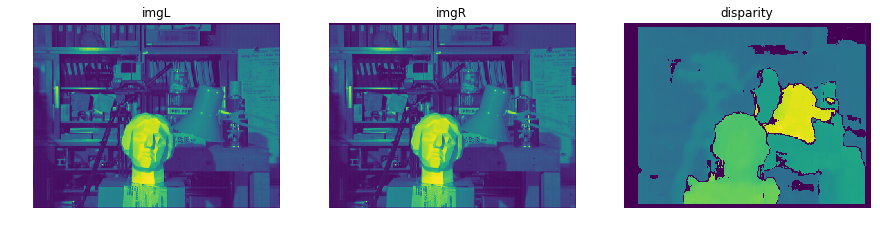

(288, 384)
(288, 384)
(288, 384)


In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def imgResize(img, scale):
    return cv2.resize(img, dsize=(0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)

imgL = cv2.imread('./tsukuba/scene1.row3.col1.ppm', cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('./tsukuba/scene1.row3.col2.ppm', cv2.IMREAD_GRAYSCALE)

# imgL = imgResize(imgL, 0.5)
# imgR = imgResize(imgR, 0.5)

stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL,imgR)

fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(131)
ax1.imshow(imgL)
ax1.set_title('imgL')
ax1.axis("off")

ax2 = fig.add_subplot(132)
ax2.imshow(imgR)
ax2.set_title('imgR')
ax2.axis("off")

ax3 = fig.add_subplot(133)
ax3.imshow(disparity)
ax3.set_title('disparity')
ax3.axis("off")

plt.show()

print(imgL.shape)
print(imgR.shape)
print(disparity.shape)

# for i in range(0, 288):
#     for j in range(0, 384):
#         print(disparity[i, j], ' ', end='')
#     print()

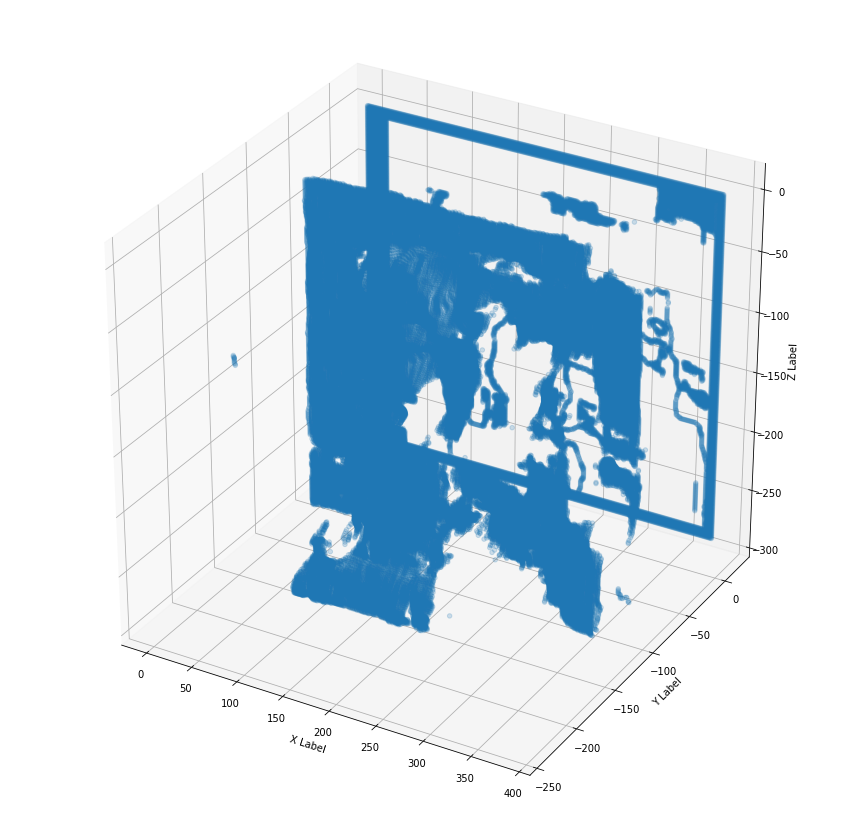

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

point = np.zeros((288, 384, 3))

for i in range(288):
    for j in range(384):
        point[i, j, 0] = i
        point[i, j, 1] = j
        point[i, j, 2] = disparity[i, j]

xs = point[:, :, 1]
ys = -(point[:, :, 2])
zs = -(point[:, :, 0])

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, alpha=0.2)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

## 색 입히기

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def ch(a):
    if len(a) == 1:
        return '0' + a
    else:
        return a

RGB = cv2.imread('./tsukuba/scene1.row3.col1.ppm', cv2.IMREAD_COLOR)

point = np.zeros((288, 384, 3))
color = []

for i in range(288):
    for j in range(384):
        point[i, j, 0] = i
        point[i, j, 1] = j
        point[i, j, 2] = disparity[i, j]
        
        R = RGB[i, 383 - j, 0]
        G = RGB[i, 383 - j, 1]
        B = RGB[i, 383 - j, 2]
        color.append('#' + ch(format(B, 'X')) + ch(format(G, 'X')) + ch(format(R, 'X')))
#         print('#' + ch(format(R, 'X')) + ch(format(G, 'X')) + ch(format(B, 'X')))

xs = point[:, :, 1]
ys = -(point[:, :, 2])
zs = -(point[:, :, 0])

xs = xs[::-1]
ys = ys[::-1]
zs = zs[::-1]
color = color[::-1]

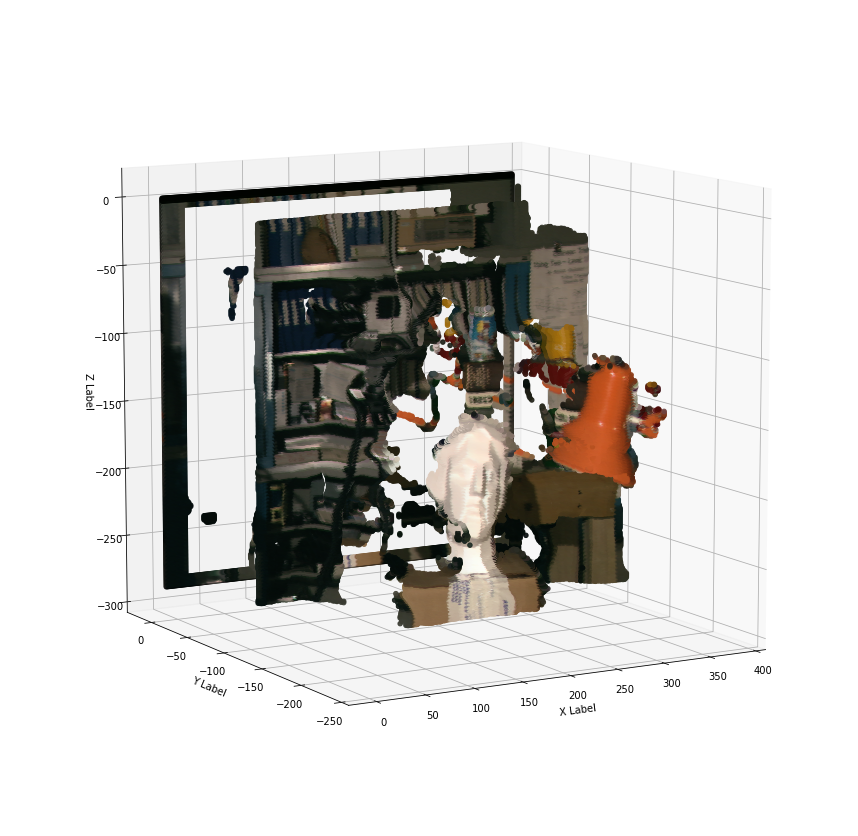

In [5]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, c=color, alpha=0.9)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(elev=10., azim=240)

plt.show()

## 회전한 사진 저장

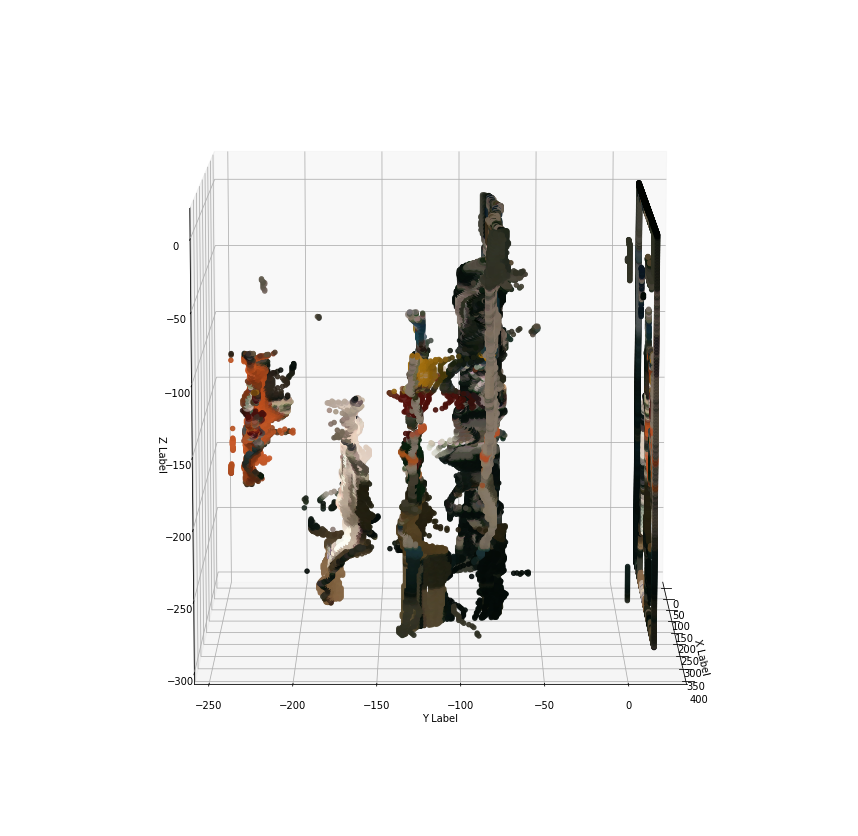

In [82]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, c=color, alpha=0.9)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

for ii in range(180,361,10):
    ax.view_init(elev=10., azim=ii)
    plt.savefig("./result/movie%d.png" % ii)
    
plt.show()